<a href="https://colab.research.google.com/github/variableVG/CV_project/blob/master/05_data_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization


In this notebook we normalize the figures and then save them as tensors. The tensors will be used in the next notebook for the convolutional neural network.

We use normalization to speed up the computation in the model and learn faster by reducing the skewness of the pixels. To achieve normalization we used the method torchvision.transforms.Normalize(). This method does not support PIL Images. Therefore, we first need to transform the pictures into tensors and then apply normalization. The normalized pictures will be stored as a tensors and used in the convolutional neural network. 

The Images will be convert to tensors using torchvision.transforms.ToTensor(). This converts the PIL image with a pixel range of 0 to 255 to a PyTorch FloatTensor of shape (C, H, W) with a range from 0 to 1.

To normalize the images, we transform their values such as the mean and the standard deviation of the image become 0 and 1 respectively. Therefore Normalize() takes 2 parameters: 
* Mean: Sequence of means for each channel
* Std: Sequence of standard deviations for each channel. 

It returns a normalized tensor image 



Sources: 
* https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html
* https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html

# Import Data and images

In [1]:
path_to_pictures = '../pics/small_pics/'
path_to_dataset = '../datasets/dataset_faces_resized.csv'

In [2]:
#import tarfile
#try:
#  tar = tarfile.open('../pics/orginal_picsall_pictures.tar')
#  tar.extractall(path='../pics/small_pics')
#  tar.close()
#except:
#  print("Pictures could not be extracted")

In [3]:
import pandas as pd
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import torch

In [4]:
df = pd.read_csv(path_to_dataset)

In [5]:
df.head()

,filename,age,gender,ethnicity
0,100_0_0_20170112213500903.jpg,61,0,0.0
1,100_0_0_20170112215240346.jpg,61,0,0.0
2,100_1_0_20170110183726390.jpg,61,1,0.0
3,100_1_0_20170112213001988.jpg,61,1,0.0
4,100_1_0_20170112213303693.jpg,61,1,0.0


In [6]:
df.shape

(24105, 4)

## Get pictures as numpy arrays

In [7]:
# WARNING: This might take long
from tqdm import tqdm
from pathlib import Path
images = []

for image in tqdm(df['filename']):
  path = path_to_pictures + image
  try: 
    img = Image.open(path).convert('RGB') # I use that to make sure all the pictures are RGB
    images.append(img)
  except FileNotFoundError as e:
    print(e)
  

100%|██████████| 24105/24105 [00:16<00:00, 1475.13it/s]


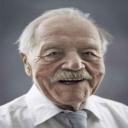

In [8]:
images[0]

In [9]:
# Check sizes
for idx, img in enumerate(images[0:5]):
  img_array = np.array(img)
  print(f"Image {idx} has shape {img_array.shape}")

Image 0 has shape (128, 128, 3)
Image 1 has shape (128, 128, 3)
Image 2 has shape (128, 128, 3)
Image 3 has shape (128, 128, 3)
Image 4 has shape (128, 128, 3)


In [10]:
img_size = (img_array.shape[0], img_array.shape[1])

# Normalize Pictures with PyTorch and save them


In [11]:
# Transform images to tensor images:

import random
mean_pixels = torch.zeros([3, len(images)]) # Create empty torch arrays for mean_pixels and std_pixels
std_pixels = torch.zeros([3, len(images)])
tensorize = T.ToTensor()

for idx, img in tqdm(enumerate(images)):
  tensor_img = tensorize(img) # Transform image to pixel values btw 0 and 1
  #tensor_images.append(tensor_img)
  mean = tensor_img.mean([1,2])
  std = tensor_img.std([1,2])
  mean_pixels[:, idx] = mean # Store the mean pixel value for each pic
  std_pixels[:, idx] = std # Store the std pixel value for each pic

mean = mean_pixels.mean(1) # Calculate mean and std for the 10 pictures
std = std_pixels.mean(1)

print(f"Mean images pixels: {mean}")
print(f"Std images pixels: {std}")

24105it [00:17, 1384.11it/s]

Mean images pixels: tensor([0.5376, 0.4764, 0.4432])
Std images pixels: tensor([0.2482, 0.2384, 0.2379])


Text(0.5, 1.0, 'distribution of pixels for first picture')

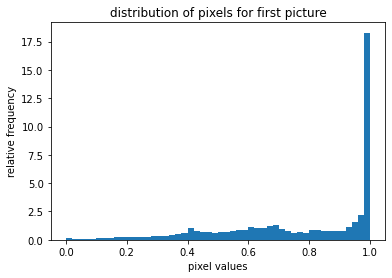

In [12]:
# Plot pixel values of last image:
tensor_img = tensorize(img)
array_img = np.array(tensor_img)

plt.hist(array_img.ravel(), bins=50, density=True)
plt.xlabel('pixel values')
plt.ylabel('relative frequency')
plt.title('distribution of pixels for first picture')

In [13]:
import os.path
import tarfile

# Instanciate Normalize() function with calculated mean and std
normalizer = T.Normalize(mean=list(mean), std=list(std))
tensorize = T.ToTensor()

path_to_save_pictures = '../pics/torch_files/'
path_to_tar = '../pics/torch_pictures.tar'
tar = tarfile.open(path_to_tar, "w")

for idx, img in tqdm(enumerate(images)):
  basename, extension = os.path.splitext(df['filename'][idx]) # get filename without extension
  path = path_to_save_pictures + basename + '.pth' # extension pth is for pythorch files
  try:
    tensor_img = tensorize(img)
    normalized_img = normalizer(tensor_img)
    torch.save(normalized_img, path)
    tar.add(path, arcname=basename + "." + 'pth')
  except RuntimeError as e:
    print(f"File {df['filename'][idx]} could not be saved: {e}")

tar.close()

24105it [06:45, 59.43it/s]


In [14]:
print(normalized_img)

tensor([[[ 1.8312,  1.8312,  1.8312,  ...,  1.8312,  1.8312,  1.8312],
         [ 1.8312,  1.8312,  1.8312,  ...,  1.8312,  1.8312,  1.8312],
         [ 1.8312,  1.8312,  1.8312,  ...,  1.8312,  1.8312,  1.8312],
         ...,
         [ 1.8628,  1.6100,  1.1676,  ...,  0.2513,  0.0933,  0.7411],
         [ 1.8312,  1.3888,  0.9149,  ...,  0.3303,  0.0459,  0.8201],
         [ 1.7996,  1.2466,  0.7411,  ...,  0.4251,  0.0775,  0.8833]],

        [[ 2.1637,  2.1637,  2.1637,  ...,  2.1637,  2.1637,  2.1637],
         [ 2.1637,  2.1637,  2.1637,  ...,  2.1637,  2.1637,  2.1637],
         [ 2.1637,  2.1637,  2.1637,  ...,  2.1637,  2.1637,  2.1637],
         ...,
         [ 2.1637,  1.7688,  1.1108,  ..., -0.3533, -0.3369,  0.4528],
         [ 2.1308,  1.5385,  0.8147,  ..., -0.2546, -0.3862,  0.5021],
         [ 2.0979,  1.3905,  0.6337,  ..., -0.1559, -0.3698,  0.5679]],

        [[ 2.3079,  2.3079,  2.3079,  ...,  2.3079,  2.3079,  2.3079],
         [ 2.3079,  2.3079,  2.3079,  ...,  2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


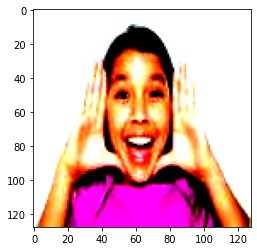

In [15]:
plt.imshow(normalized_img.permute(1, 2, 0))